<a href="https://colab.research.google.com/github/smileyfish4/BA305FINALPROJECT/blob/main/BA305_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
%matplotlib inline
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


# **Preprocessing**

In [27]:
# load data as a dataframe
cancer_df = pd.read_csv('data.csv')
# check if data is loaded correctly
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
# print a concise summary of the Dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [29]:
# drop Unnamed: 32 and id
cancer_df = cancer_df.drop(['Unnamed: 32', 'id'], axis=1)
#change spaces to _
cancer_df.columns = cancer_df.columns.str.replace(' ', '_')
# Convert M/B into 1/0
cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)
#check it dropped the columns correctly
cancer_df.head()

<ipython-input-29-3cbdafca1454>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)
<ipython-input-29-3cbdafca1454>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# Define X (inputs/predictors) and y (output/outcome)
X = cancer_df.drop(columns=['diagnosis'])
y = cancer_df['diagnosis']

In [31]:
# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [32]:
# Create accuracy scores dictionary
accuracy_scores_dict = {}

# Baseline Model: Majority Rule

In [51]:
base_train = y_train.value_counts().idxmax()
print("Majority Class:", base_train)

Majority Class: 0


In [52]:
base_test = y_test.value_counts()
base_acc = base_test[base_train] / (base_test[0] + base_test[1])

print('Baseline model accuracy: ', (base_acc))

Baseline model accuracy:  0.6359649122807017


# **Decision Tree**

## Full Tree

In [33]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
#print basic structure of full tree
print('Number of classes: ', full_clf.tree_.n_classes)
print('Number of features: ', full_clf.tree_.n_features)
print('Number of nodes: ', full_clf.tree_.node_count)
print('Number of leaves: ', full_clf.tree_.n_leaves)
print('Number of maximum depth: ', full_clf.tree_.max_depth)

Number of classes:  [2]
Number of features:  30
Number of nodes:  29
Number of leaves:  15
Number of maximum depth:  7


In [35]:
# Text representation of full tree
text_representation = tree.export_text(full_clf)
print(text_representation)

|--- feature_7 <= 0.05
|   |--- feature_3 <= 995.50
|   |   |--- feature_25 <= 0.45
|   |   |   |--- feature_14 <= 0.00
|   |   |   |   |--- feature_1 <= 19.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  19.90
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_14 >  0.00
|   |   |   |   |--- feature_13 <= 46.32
|   |   |   |   |   |--- feature_21 <= 32.78
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_21 >  32.78
|   |   |   |   |   |   |--- feature_21 <= 33.81
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_21 >  33.81
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  46.32
|   |   |   |   |   |--- feature_14 <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_14 >  0.01
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_25 >  0.45
|   |   |   |--- class: 1
|   |--- feature_3 >  995.50
|   |   |--- class: 1
|--- feature_7 >  0.05
|   |---

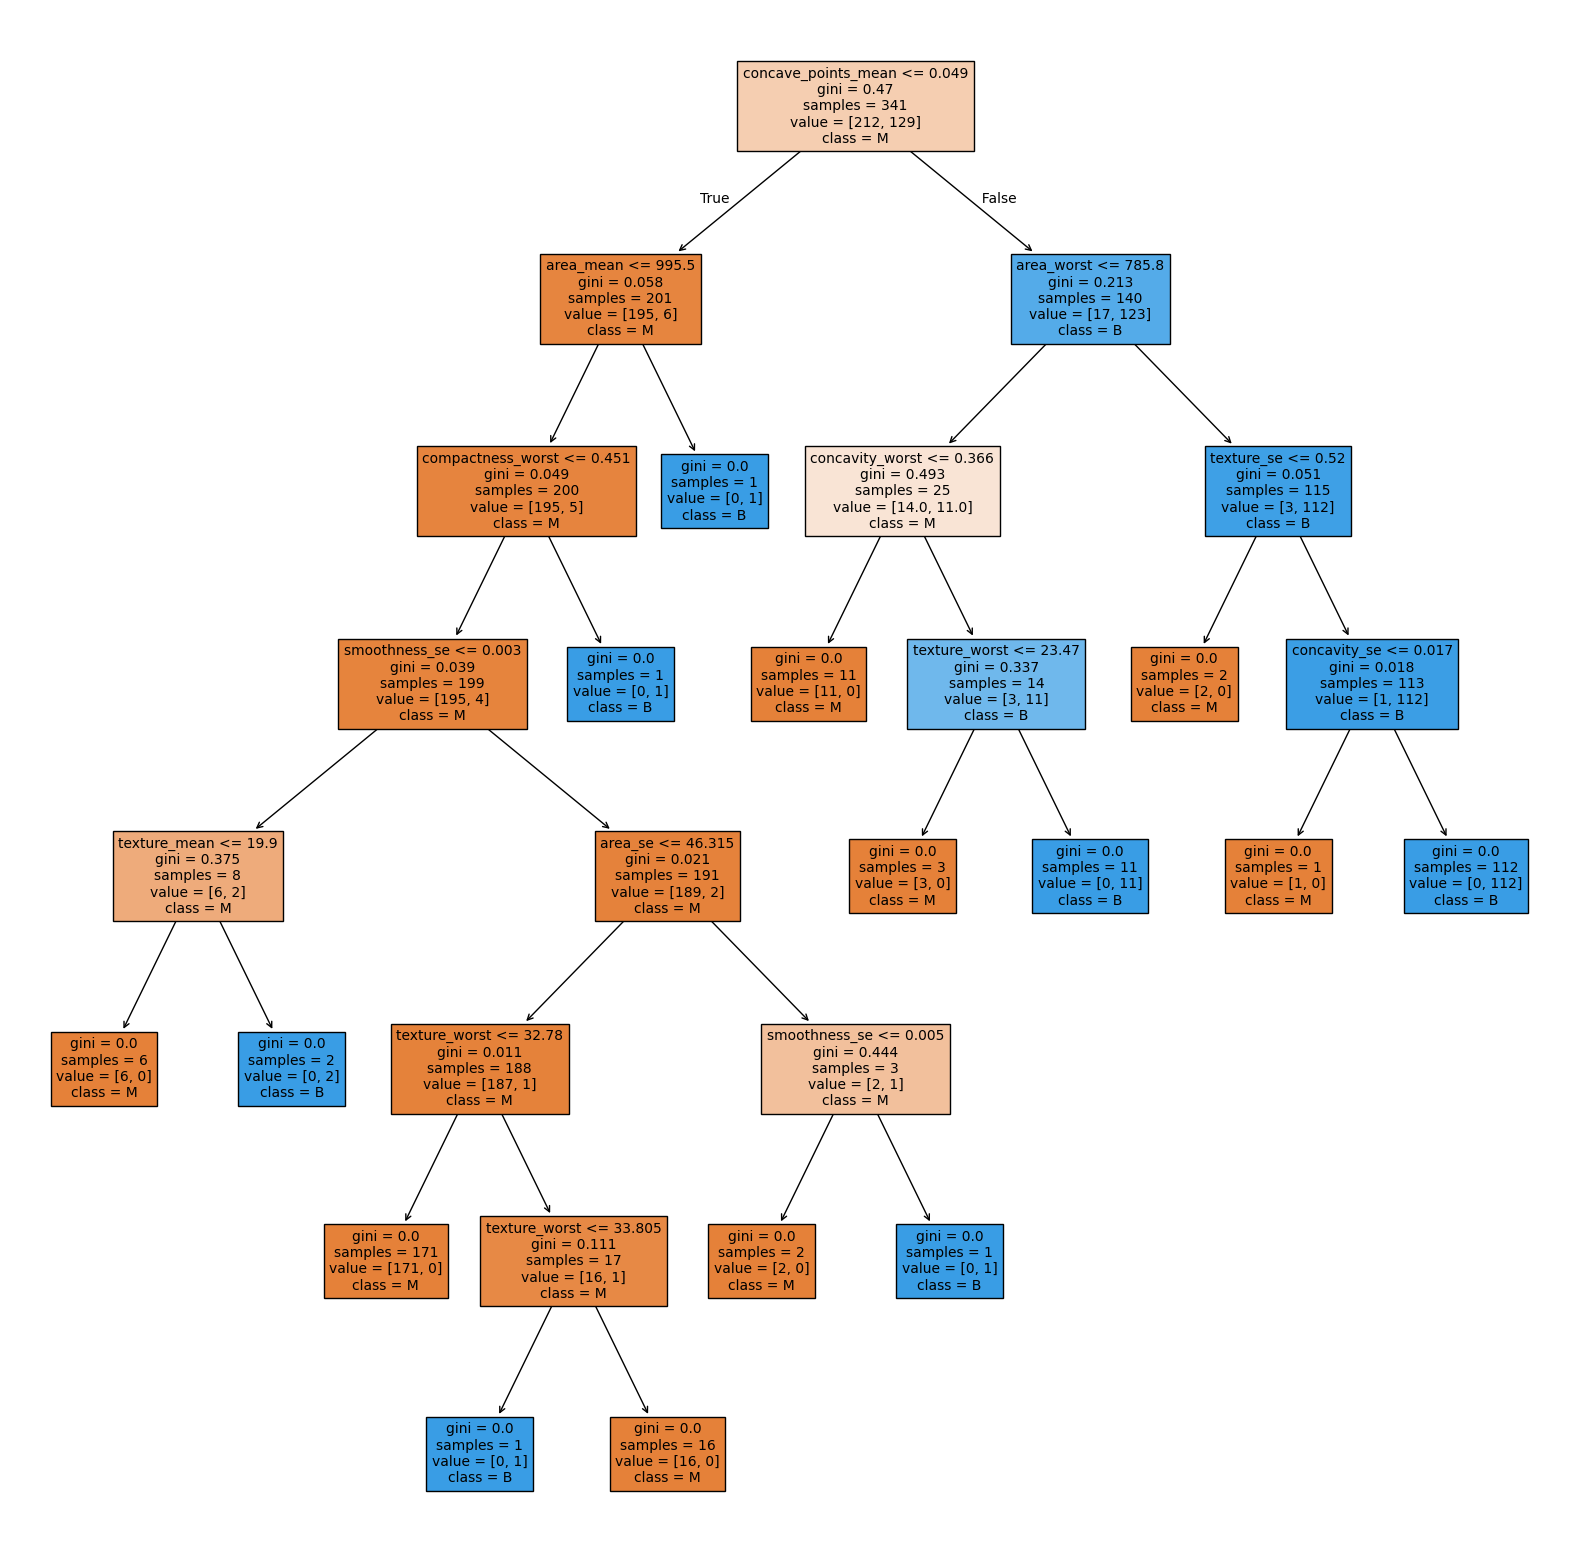

In [36]:
# Visualize the full tree via "plot_tree" function

# Re-size the figure via matplotlib
plt.figure(figsize=(20,20))

# call plot_tree function to plot the tree
cnames = ['M', 'B']
tree.plot_tree(full_clf, feature_names = X_train.columns, class_names = cnames, fontsize = 10, filled = True);

In [37]:
# Feed input data to model to predict y output for test data
y_pred_test = full_clf.predict(X_test)

In [38]:
# Accuracy of full tree on test sets
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

#append accuracy score to dictionary
accuracy_scores_dict['Full Tree'] = round(test_score*100,1)

Accuracy score of full tree on testing data = 89.5 %


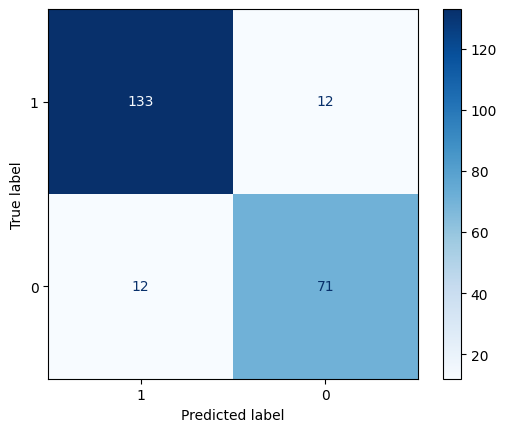

In [39]:
# Confusion matrix of full tree on test set
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

The final accuracy of the full tree on the testing data is 89.5% which is not a great accuracy score. The confusion matrix states that it correctly identified 133 patients as having a malignant tumor when they had a malignant tumor (true positive) and correctly identified 71 patients as having a benign tumor when they had a benign tumor (true negative). However, it incorrectly categorized 12 patients as having a malignant tumor when they had a benign tumor (false positive) and incorreclty categorized 12 patients as having a benign tumor when they had a malignant tumor (false negative).

## Pruned Decision Tree

In [40]:
alphas = full_clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas
alphas

array([0.        , 0.00290184, 0.00563319, 0.0058132 , 0.0113231 ,
       0.01382488, 0.02230415, 0.03433417, 0.34863814])

In [41]:
# Create a decision tree for each possible value of alpha, and store the
# trees in an array called 'clfs'

clfs = [] # this creates an empty array (placeholder)

# now loop through all the possible alphas
for i in alphas:
    my_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    my_clf.fit(X_train, y_train)
    clfs.append(my_clf) #this line adds to the fitted tree to the clfs[] array

# Display final array of Trees:
clfs

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.00290184397598685),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005633193446869548),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005813199076116565),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.011323100809131435),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.01382488479262673),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.02230414746543779),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.03433416513360409),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.3486381447603151), random_state=0)]

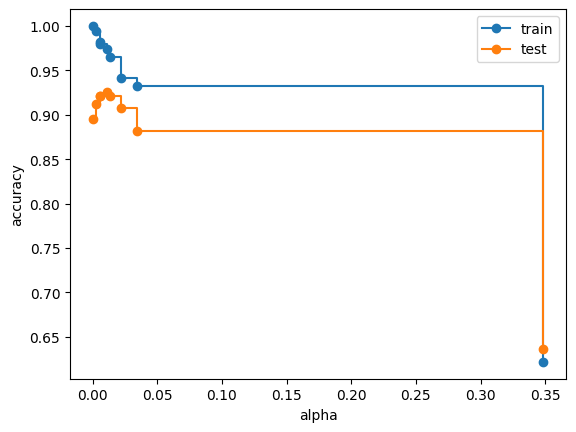

In [42]:
# Plot the tree predictive accuracy as a function of alpha
train_scores = [accuracy_score(y_train, x.predict(X_train)) for x in clfs]
test_scores = [accuracy_score(y_test, x.predict(X_test)) for x in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

It is hard to evaluate based on the gaph above due to the outlier alpha of  0.34863814. Since it gives a low accuracy, which we don't want, we removed the outlier to find a better alpha score to prune our data with.

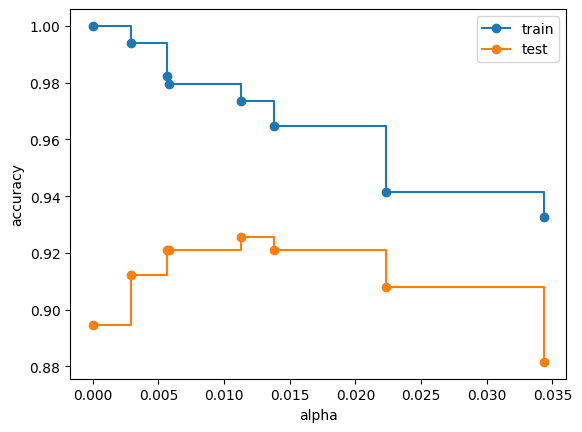

In [43]:
# Set threshold to keep top 80% of test accuracy
train_scores_threshold = train_scores[:-1]
test_scores_threshold = test_scores[:-1]
alphas_threshold = alphas[:-1]


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas_threshold, train_scores_threshold, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas_threshold, test_scores_threshold, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Based on this graph it appears that the alpha 0.0223 is the best since it has the smallest gap but we can check this below.

In [44]:
# Set threshold to keep top 80% of test accuracy
threshold = max(test_scores) * 0.8
filtered_indices = [i for i in range(len(test_scores)) if test_scores[i] >= threshold]

# Among those, find the one with the smallest gap between testing and training data
best_index = min(filtered_indices, key=lambda i: abs(train_scores[i] - test_scores[i]))
best_alpha = alphas[best_index]

print(f"Best alpha (top accuracy + smallest gap): {best_alpha}")
print('Accuracy score of pruned tree on testing data =', round(test_scores[best_index]*100,1), '%')

#append accuracy score to dictionary
accuracy_scores_dict['Pruned Tree'] = round(test_scores[best_index]*100,1)

Best alpha (top accuracy + smallest gap): 0.02230414746543779
Accuracy score of pruned tree on testing data = 90.8 %


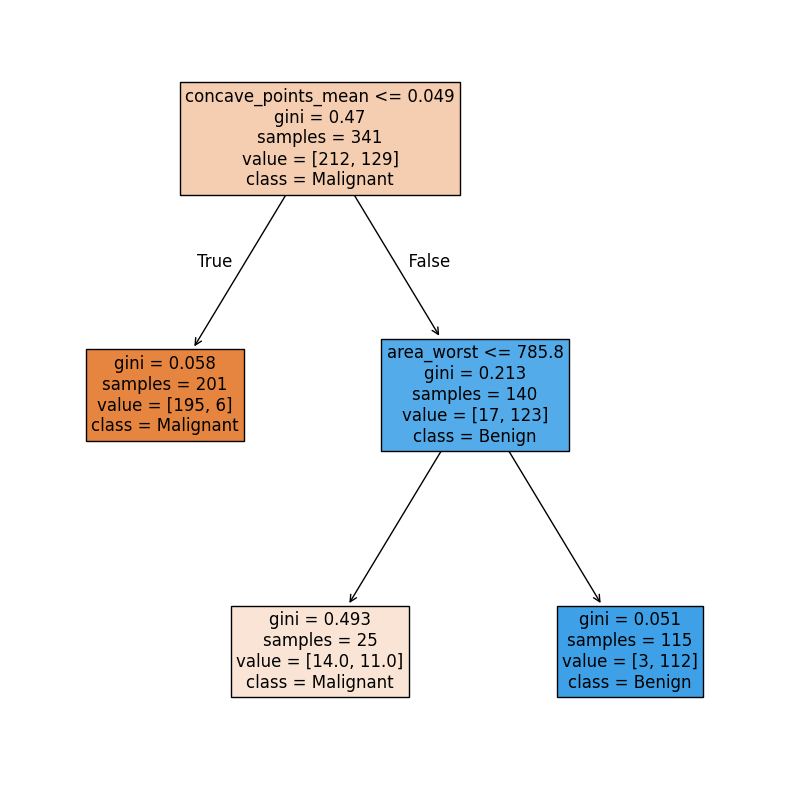

In [45]:
pruned_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_clf.fit(X_train, y_train)

fig = plt.figure(figsize = (10,10))

cnames = ['Malignant','Benign']
tree.plot_tree(pruned_clf, fontsize = 12, feature_names = X_train.columns, class_names = cnames, filled = True);

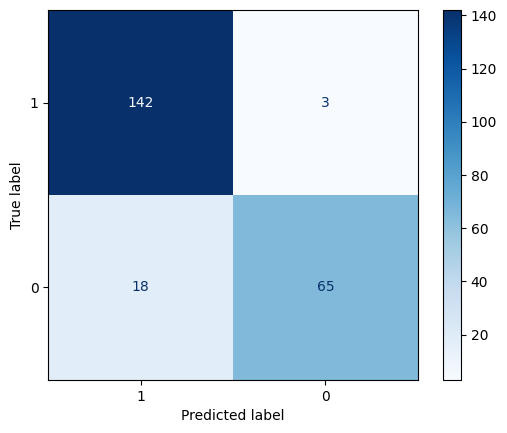

In [46]:
# Confusion matrix of pruned tree
y_pred_pruned = pruned_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_pruned)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

The pruned tree only gives us slightly better accuracy than the full tree with an accuracy score of 90.8%.

According to our pruned tree analysis, the most important feature is concave_points_mean, the average number of concaved points on the tumor.

# **Random Forests**

In [47]:
# Run random forest classifier 10,000 times
rf = RandomForestClassifier(
    n_estimators=10000,
    random_state=0,
    criterion='gini')
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, random_state=0)

In [25]:
# Print the accuracy score of the best found tree in the forest
print('Accuracy score of random forests on testing data =', round(accuracy_score(y_test, rf.predict(X_test))*100,1), '%')

#append accuracy score to dictionary
accuracy_scores_dict['Random Forest'] = round(accuracy_score(y_test, rf.predict(X_test))*100,1)

Accuracy score of random forests on testing data = 94.3 %


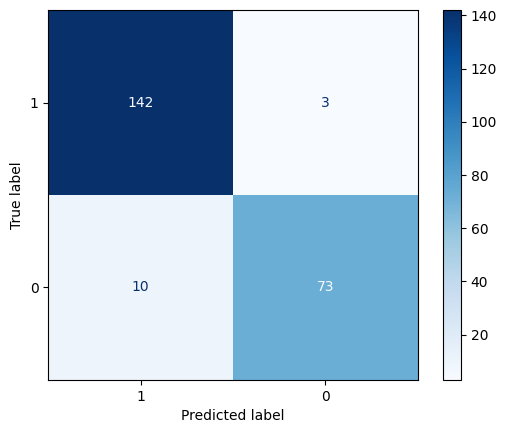

In [48]:
# Confusion matrix of random forest
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

# K-Nearest Neighbours

In [53]:
#Standardize the data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


In [55]:
best_k = []

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)

    best_k.append({
        'k': k,
        'accuracy': cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    })

kresults_df = pd.DataFrame(best_k)
kresults_df

,k,accuracy
0,1,0.950171
1,2,0.932481
2,3,0.958909
3,4,0.958909
4,5,0.964791
...,...,...
95,96,0.906095
96,97,0.906095
97,98,0.903154
98,99,0.903154


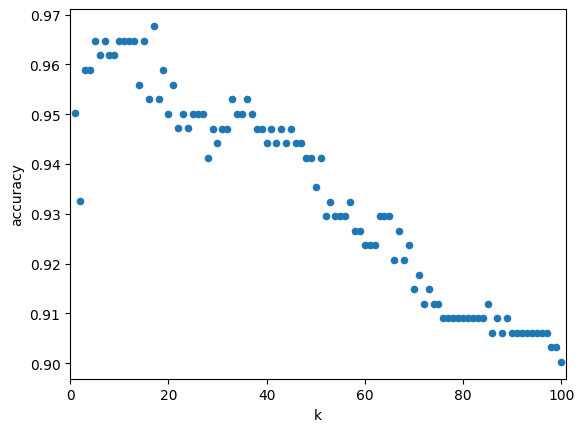

In [56]:
#plot accuracy vs. k
kresults_df.plot.scatter(x='k', y='accuracy', xlim=[0, 101]);

In [57]:
# Find the max value and associated index
max_val = kresults_df['accuracy'].max()
max_val_idx = kresults_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", kresults_df['k'][max_val_idx])

Max value = 0.9677323103154306 |  Best k = 17


Accuracy: 0.9298245614035088


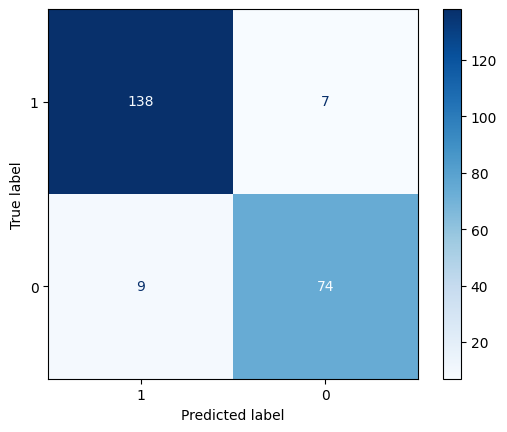

In [58]:
# Confusion matrix and accuracy for the validation data, using best k = 17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)

pred_y = knn.predict(X_test_scaled)
knn_cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Plot the confusion matrix
kdisp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=cancer_df.diagnosis.unique())
kdisp.plot(cmap=plt.cm.Blues)
plt.show()